# Table of Contents
### Introduction
### 1. Load and Explore the Data  
### 2. Preprocessing and Scaling  
### 3. Train Linear Regression Model  
### 4. Model Evaluation  
### 5. Feature Importance  
### 6. Visualize Predictions  
### 7. Predict with Custom Input  

# Introduction
In this project, we aim to predict the compressive strength of concrete using machine learning techniques. **Compressive strength** is a critical mechanical property in structural engineering, reflecting how much load a concrete mixture can bear before failing. Accurate prediction of this property is essential for ensuring the safety and performance of construction materials.

The dataset used in this study is sourced from Kaggle and contains **1,030 samples** of concrete mixes, each characterized by **eight input variables**:

- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate
- Age (in days)

The **target variable** is the **compressive strength** of concrete, measured in MPa. The goal is to build a regression model that learns the relationship between mix proportions and compressive strength, allowing us to predict strength for new, unseen mixtures.

This problem is particularly relevant to the field of civil and materials engineering, and it serves as a practical example of how machine learning can assist in optimizing material design and quality control in concrete production.

In [50]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 📊 1. Load and Export Data Set

In [51]:
# Load the dataset
df = pd.read_csv("CCS.csv")

# Define features (all except the target)
X = df.drop("Concrete compressive strength ", axis=1)

# Define target
y = df["Concrete compressive strength "]

In [52]:
# Statistical Description of Data -> Scaling is needed
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# ⚙️ 2. Preprocessing and Scaling

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 3. Train Linear Regression Model

In [55]:
# Fit Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
# Make Predictions
y_pred = model.predict(X_test_scaled)

In [57]:
# Output model parameters
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (coefficient): 12.78650432386157
Intercept: 35.85771806805097


# 📈 4. Model Evaluation

In [58]:
#  Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 95.97548435260975
R² Score: 0.6275416055417098


# 📌 5. Feature Importance

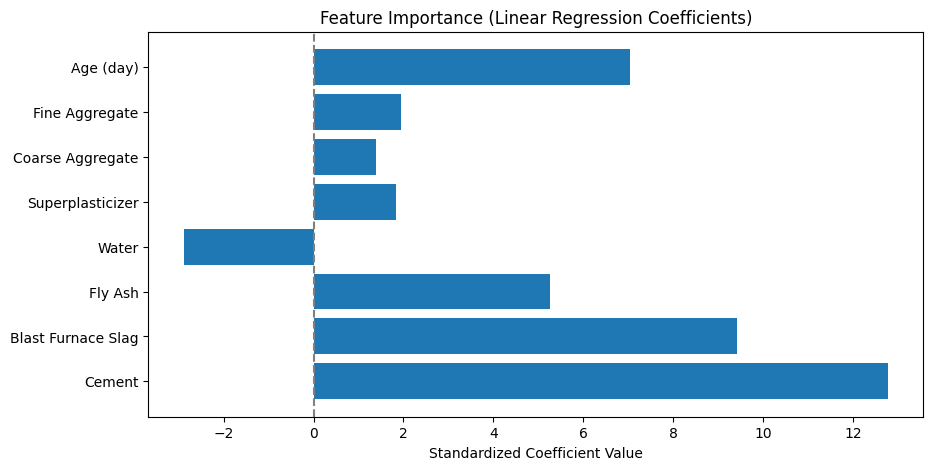

In [59]:
# Feature Importance
coefs = model.coef_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, coefs)
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Standardized Coefficient Value")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

# Explanation of Feature Importance
This bar chart displays the standardized coefficients from the linear regression model, allowing us to compare the relative importance of each feature in predicting compressive strength. Cement, Blast Furnace Slag, and Age (days) are the most influential factors. Water has a negative effect, which supports the water-cement ratio principle in concrete mix design.

# 📉 6. Visualize Predictions  

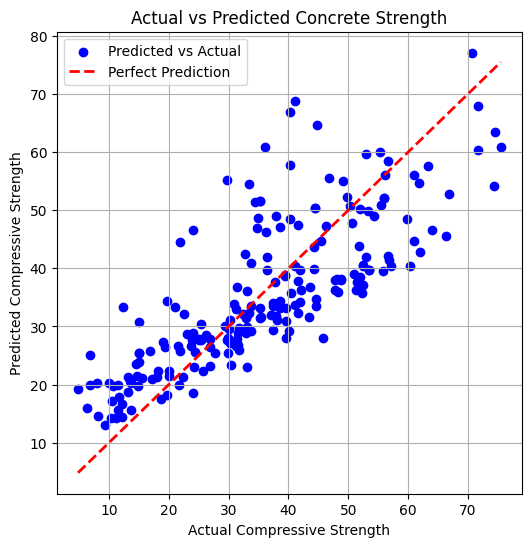

In [60]:
# Plot results
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs Predicted Concrete Strength")
plt.legend()
plt.grid(True)
plt.show()

# 🔮 7. Predict with Custom Input

# Try model prediction with your inputs:
| Feature                | Description                         | Typical Range (kg/m³ or days) | Notes                                                              |
| ---------------------- | ----------------------------------- | ----------------------------- | ------------------------------------------------------------------ |
| **Cement**             | Binder material                     | **100 – 500**                 | Common mixes use 250–400                                           |
| **Blast Furnace Slag** | Supplementary cementitious material | **0 – 300**                   | Often used in blended cements                                      |
| **Fly Ash**            | Supplementary cementitious material | **0 – 200**                   | Used to replace cement partially                                   |
| **Water**              | Mixing water                        | **120 – 250**                 | Crucial for workability and strength                               |
| **Superplasticizer**   | Chemical admixture                  | **0 – 30**                    | Typically a small percentage                                       |
| **Coarse Aggregate**   | Larger stones                       | **800 – 1150**                | Determines bulk of volume                                          |
| **Fine Aggregate**     | Sand and fine particles             | **600 – 1000**                | Affects finish and compaction                                      |
| **Age (day)**          | Curing time                         | **1 – 365**                   | Strength increases with age, usually measured at 7, 28, or 90 days |



In [61]:
# Input
cement = float(input("Enter Cement (kg/m³): "))
slag = float(input("Enter Blast Furnace Slag (kg/m³): "))
fly_ash = float(input("Enter Fly Ash (kg/m³): "))
water = float(input("Enter Water (kg/m³): "))
superplasticizer = float(input("Enter Superplasticizer (kg/m³): "))
coarse_agg = float(input("Enter Coarse Aggregate (kg/m³): "))
fine_agg = float(input("Enter Fine Aggregate (kg/m³): "))
age = float(input("Enter Age (days): "))

user_input = [[cement, slag, fly_ash, water, superplasticizer, coarse_agg, fine_agg, age]]
user_input_scaled = scaler.transform(user_input)
predicted_strength = model.predict(user_input_scaled)[0]

print(f"\nPredicted Compressive Strength: {predicted_strength:.2f} MPa")

if predicted_strength < 0:
    print("⚠️ Warning: Predicted strength is negative — check input ranges.")

Enter Cement (kg/m³): 450
Enter Blast Furnace Slag (kg/m³): 200
Enter Fly Ash (kg/m³): 100
Enter Water (kg/m³): 180
Enter Superplasticizer (kg/m³): 20
Enter Coarse Aggregate (kg/m³): 1000
Enter Fine Aggregate (kg/m³): 900
Enter Age (days): 56

Predicted Compressive Strength: 82.55 MPa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
